In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from scipy import stats
import statsmodels.api as sm

In [2]:
## Import data

path_in = './data/'
train_cols = ['date', 'store', 'item', 'sales']
train_dtypes = {'date': 'str', 'store': 'int', 'item': 'int', 'sales': 'int'}
parse_dates = ['date']

test_cols = ['date', 'store', 'item']
test_dtypes = {'date': 'str', 'store': 'int', 'item': 'int'}


train = pd.read_csv(path_in + 'train.csv', dtype = train_dtypes, parse_dates = ['date'])
test = pd.read_csv(path_in + 'test.csv', dtype = test_dtypes, parse_dates = ['date'])

In [3]:
print('The shape of the train and test sets are respectively {} and {}'.format(train.shape, test.shape))

The shape of the train and test sets are respectively (913000, 4) and (45000, 4)


The maximum amount of sales is 231.
The average amount of sales is 52.25.
The median amount of sales is 47.00.


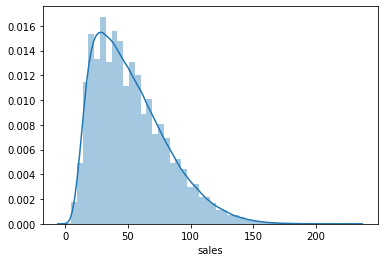

In [4]:
sns.distplot(train['sales'])
print('The maximum amount of sales is %s.' % (max(train['sales'])))
print('The average amount of sales is %.2f.' % (np.mean(train['sales'])))
print('The median amount of sales is %.2f.' % (np.median(train['sales'])))

So there are 10 stores with 50 different products. The sales for each item range between 0 and 231, but they are mainly around the 30-70 range. There is five years worth of sales data (2013-2017) to train on and the goal is the predict the sales for the next 3 months.

In [5]:
train.sample(10)

,date,store,item,sales
265809,2015-11-06,6,15,80
479224,2015-03-24,3,27,23
263864,2015-07-10,5,15,80
364602,2016-05-13,10,20,79
472244,2016-02-11,9,26,57
433104,2013-12-09,8,24,42
437176,2015-02-02,10,24,57
782495,2015-08-26,9,43,55
66072,2013-12-03,7,4,10
524688,2014-09-19,8,29,90


In [6]:
test.sample(10)

,id,date,store,item
31404,31404,2018-03-26,9,35
26208,26208,2018-01-19,2,30
7399,7399,2018-01-20,3,9
44948,44948,2018-02-08,10,50
12345,12345,2018-01-16,8,14
20881,20881,2018-01-02,3,24
20719,20719,2018-01-20,1,24
7252,7252,2018-02-22,1,9
28025,28025,2018-02-05,2,32
38702,38702,2018-01-03,1,44


So there is an extra column called 'id' in the test set that is likely used to submit the file

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null datetime64[ns]
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [8]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [9]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [10]:
sample = train.loc[train['store'] == 5].loc[train['item'] == 1]

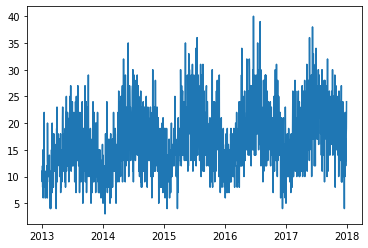

In [11]:
register_matplotlib_converters()
plt.plot(sample['date'], sample['sales'])

In [12]:
train['day_of_week'] = train['date'].dt.dayofweek
train['week'] = train['date'].dt.week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year


There is definitely a pattern with sales generally going up in the summer and going down in the winter with a trend of increasing sales year after year. The day of the week might also have some effect on the trend.

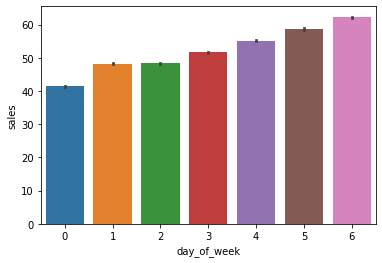

In [13]:
sns.barplot(x='day_of_week', y = 'sales', data = train)

Sales patterns seem to vary depending on what day it is. Sales are the lowest on Mondays and continue to raise to its peak on Sundays.

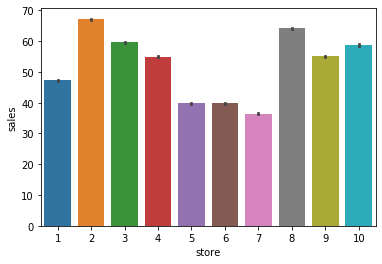

In [14]:
sns.barplot(x='store', y = 'sales', data = train)

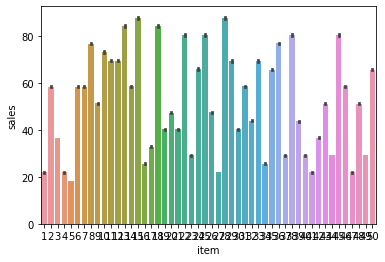

In [15]:
sns.barplot(x='item', y = 'sales', data = train)

There is quite of variation of sales depending on the store and product

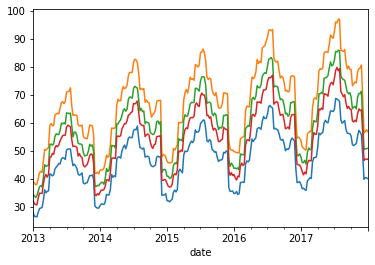

In [24]:
for i in range(1,5):
    train.loc[train['store'] == i].set_index(keys = ['date']).sort_index(ascending=True).resample('W').mean()['sales'].plot()
    

You can see that different stores have very similar demand patterns throughout the year

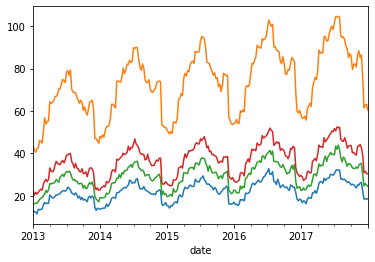

In [25]:
for i in [1, 10, 23, 42]:
    train.loc[train['item'] == i].set_index(keys = ['date']).sort_index(ascending=True).resample('W').mean()['sales'].plot()

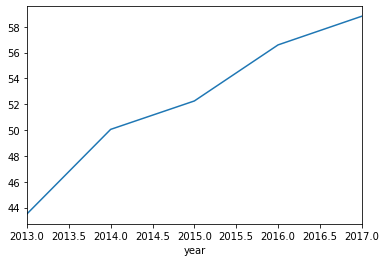

In [26]:
train.groupby('year').mean()['sales'].plot()

There is a general trend of sales growth every year

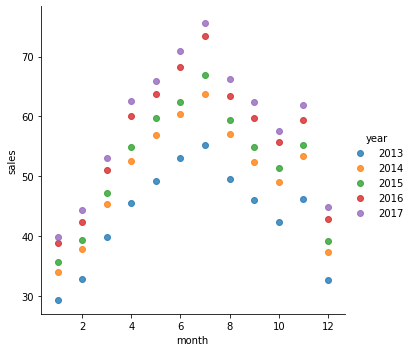

In [27]:
temp = train.set_index(keys = ['date']).sort_index(ascending=True).groupby(['year', 'month'])['sales'].mean().reset_index()
sns.lmplot(x = 'month', y = 'sales', hue = 'year', data = temp, fit_reg = False)

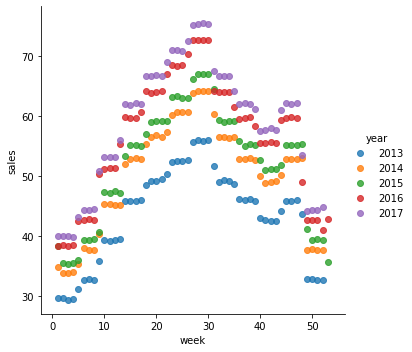

In [28]:
temp = train.set_index(keys = ['date']).sort_index(ascending=True).groupby(['year', 'week'])['sales'].mean().reset_index()
sns.lmplot(x = 'week', y = 'sales', hue = 'year', data = temp, fit_reg = False)

Sales seem to depend quite highly on which month of the year it is, but not so much which specific week of the year it is. Sales data is similar whether it is the first or last week of the month.